In [66]:
import numpy as np
import matplotlib.pyplot as plt
import numba
from matplotlib import animation
import scienceplots
plt.style.use(['science','ieee'])

In [68]:
N=100

In [69]:
init_random=np.random.random((N,N))
lattice_Ne=np.ones((N,N))

In [70]:
lattice_Ne[init_random<=0.75]=-1


In [73]:
@numba.njit("(f8[:,:], i8, f8)", nogil=True)
def metropolis(spin_arr, times, T):
    spin_arr = spin_arr.copy()
    
    for t in range(0, times-1):
        x = np.random.randint(0, N)
        y = np.random.randint(0, N)
        spin_i = spin_arr[x, y] 
        spin_f = spin_i * -1
        E_i = -spin_i * (spin_arr[(x-1) % N, y] + spin_arr[(x+1) % N, y] + spin_arr[x, (y-1) % N] + spin_arr[x, (y+1) % N])
        E_f = -E_i
        dE = E_f - E_i
        if (dE > 0) * (np.random.random() < np.exp(-1/T * dE)):
            spin_arr[x, y] = spin_f
        elif dE <= 0:
            spin_arr[x, y] = spin_f
            
    return spin_arr


0 0.5606060606060606
0 0.5606060606060606
0 0.5606060606060606
1 0.6
2 0.6393939393939393
3 0.6787878787878787
4 0.7181818181818181
5 0.7575757575757576
6 0.7969696969696969
7 0.8363636363636363
8 0.8757575757575757
9 0.915151515151515
10 0.9545454545454545
11 0.9939393939393939
12 1.0333333333333332
13 1.0727272727272728
14 1.112121212121212
15 1.1515151515151514
16 1.190909090909091
17 1.2303030303030302
18 1.2696969696969695
19 1.309090909090909
20 1.3484848484848484
21 1.3878787878787877
22 1.4272727272727272
23 1.4666666666666666
24 1.5060606060606059
25 1.5454545454545454
26 1.5848484848484847
27 1.624242424242424
28 1.6636363636363636
29 1.703030303030303
30 1.7424242424242422
31 1.7818181818181817
32 1.821212121212121
33 1.8606060606060604
34 1.9
35 1.9393939393939392
36 1.9787878787878785
37 2.018181818181818
38 2.0575757575757576
39 2.0969696969696967
40 2.1363636363636362
41 2.175757575757576
42 2.215151515151515
43 2.2545454545454544
44 2.293939393939394
45 2.33333333333333

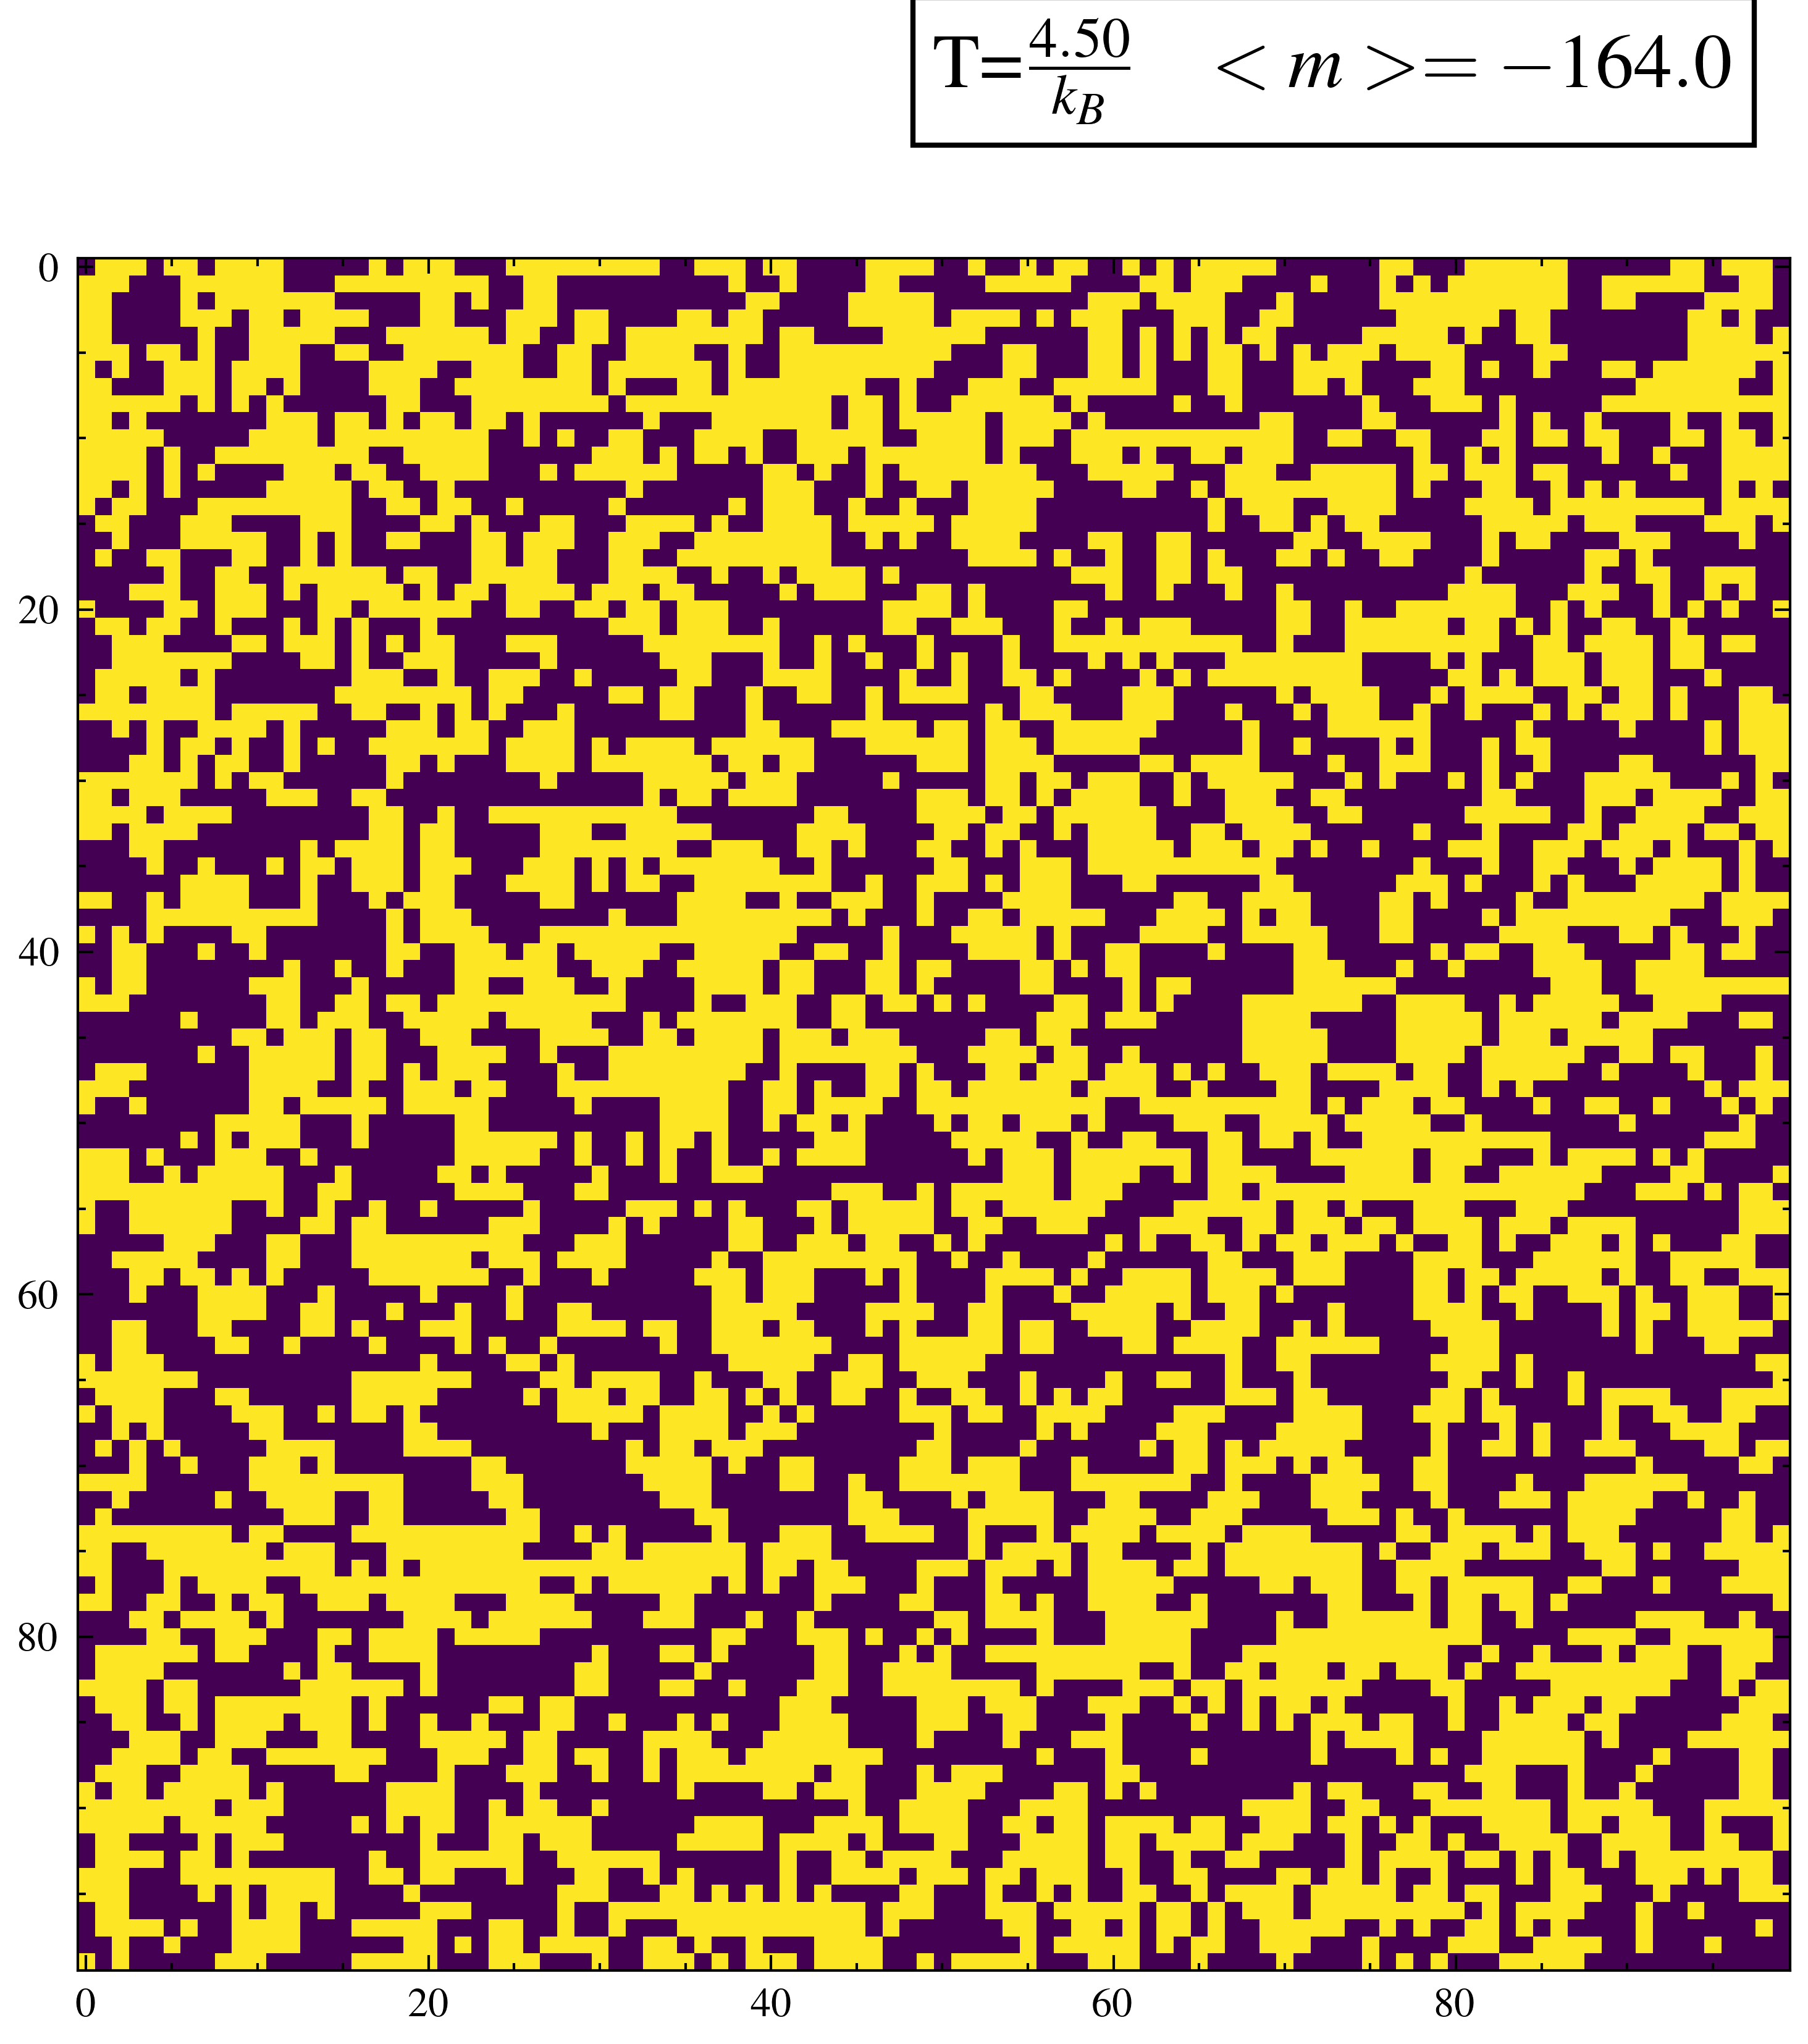

In [74]:
# Set up the plot
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
ln1 = plt.imshow(lattice_Ne, cmap='viridis', animated=True)
time_text = ax.text(0.5, 1.1, '', fontsize=15, transform=ax.transAxes, bbox=dict(facecolor='white', edgecolor='black'))

Ti=0.6
Tf=4.5
Nombre_iters=100
m=(Tf-Ti)/(Nombre_iters-1)
b=Ti-m
def i_to_T(pas):
    return m*pas+b

def update(i):
    global lattice_Ne
    lattice_Ne = metropolis(lattice_Ne, 1E7, i_to_T(i+1))
    m_hat=lattice_Ne.sum()
    ln1.set_array(lattice_Ne)
    time_text.set_text(r'T=$\frac{{{:.2f}}}{{k_B}} \ \ \ <m>={}$'.format(i_to_T(i+1),m_hat))
    print(i,i_to_T(i))
    return ln1, time_text

ani = animation.FuncAnimation(fig, update, frames=range(Nombre_iters), interval=100, blit=True)
ani.save('Estat_final_vs_T.gif', writer='pillow', fps=1.5, dpi=100)

plt.show()
